## Random Graphs
An undirected simple graph is a pair $G(V,E)$, where $V$ is a set of $n$ vertices (or nodes) and $E$ is a set of $m$ edges. In a directed graph the edges $E$ are oriented.

Function that creates an undirected/directed simple graph with $N$ nodes which are randomly connected by $M$ edges (no self-edges).

In [1]:
import networkx as nx


import numpy as np

def random_graph(N, M):
    G = nx.Graph() 
    max_edges = N*(N-1)/2 #excluding multigraphs this would be (N-1)
    if M > max_edges:
        raise ValueError(f"Number of edges M={M} is greater than the maximum number of edges for N={N} nodes (not more than {N*(N-1)/2} edges).")

    G.add_nodes_from(range(1,N+1))

    while G.number_of_edges() <= M-1: 

        a, b = np.random.choice(list(G.nodes), size=2, replace=False)
        if not G.has_edge(a, b) and a != b:
            G.add_edge(a, b)
    return G
    
    
def random_di_graph(N, M):
    G = nx.DiGraph()

    max_edges = N*(N-1) 
    if M > max_edges:
        raise ValueError(f"Number of edges M={M} is greater than the maximum number of" + 
                         "edges for N={N} nodes (not more than {N*(N-1)} edges).")


    G.add_nodes_from(range(1, N+1)
    while G.number_of_edges() <= M-1:

        a, b = np.random.choice(list(G.nodes), size=2, replace=False)

        if not G.has_edge(a, b) and a != b:
            G.add_edge(a, b)

    return G


SyntaxError: '(' was never closed (4115189495.py, line 31)

Test for random undirected graph:

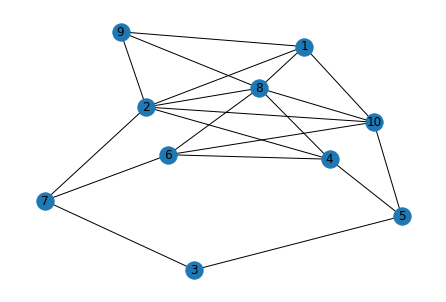

In [34]:
G1 = random_graph(10,20)
nx.draw(G1, with_labels=True)

Maximum amount of edges: $M = \frac{N \times (N-1)}{2}$

Test for random directed graph:

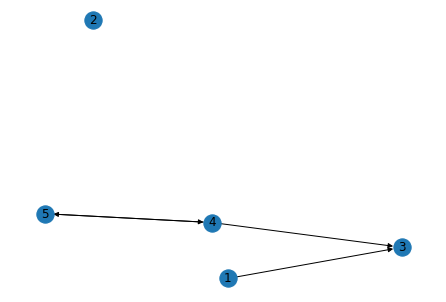

In [13]:
G2 = random_di_graph(5,4)
nx.draw(G2, with_labels=True)


Maximin amount of edges: $M = N \times (N-1)$

## Adjacency, Degree and Laplacian Matrix
The adjacency matrix $A$, the degree matrix $D$ and the Laplacian matrix $L$ are defined as
$$ \begin{align} 
    \mathbf{D}_{ij} &= 
    \begin{cases}
        \text{deg}(v_i) & i = j \\
        0 & \, \text{else}
    \end{cases}\\
    \mathbf{A}_{ij} &= 
    \begin{cases}
        1 & (i,j) \in \text{edge}\\
        0 & \, \text{else}
    \end{cases}\\
    \mathbf{L}_{ij} &= \mathbf{D}_{ij} - \mathbf{A}_{ij} = 
    \begin{cases}
        \text{deg}(v_i) & i = j \\
        -1 & (i,j) \in \text{edge} \\
        0 & \, \text{else}
    \end{cases}
\end{align} $$


In [42]:
def my_adjacency_matrix(G):
    A = np.zeros([G.number_of_nodes(), G.number_of_nodes()]) #
    for i in range(G.number_of_nodes()):
        for j in range(G.number_of_nodes()):
            if G.has_edge(i+1, j+1):
                A[i,j] = 1

    return A


def my_degree_matrix(G):
    D = np.zeros([G.number_of_nodes(), G.number_of_nodes()])

    for i in range(G.number_of_nodes()):
        degree_i = G.degree(i+1)
        D[i,i] = degree_i
        
    return D


def my_laplacian_matrix(G):
    L = np.zeros([G.number_of_nodes(), G.number_of_nodes()])
    A = my_adjacency_matrix(G)
    D = my_degree_matrix(G)

    for i in range(G.number_of_nodes()):
      for j in range(G.number_of_nodes()):
        L[i,j] = D[i, j] - A[i, j]
    
    return L
Gtest = random_graph(5, 4)
assert (my_adjacency_matrix(Gtest) == nx.adjacency_matrix(Gtest).todense()).all() 

Defining a random graph for tests:

In [15]:
F = random_graph(5,4)

Test for Adjacency matrix:

In [16]:
my_adjacency_matrix(F)

array([[0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [43]:
print(nx.adjacency_matrix(F).todense())


[[0 0 1 0 1]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 1 0 0]
 [1 0 0 0 0]]


In [25]:
(abs(nx.adjacency_matrix(F)- my_adjacency_matrix(F)) < 1e-8).all() # PB: You can also use this to just output a boolean.

True

Both the matrices are equal. 

Test for Laplacian matrix:

In [19]:
my_laplacian_matrix(F)

array([[ 2.,  0., -1.,  0., -1.],
       [ 0.,  1.,  0., -1.,  0.],
       [-1.,  0.,  2., -1.,  0.],
       [ 0., -1., -1.,  2.,  0.],
       [-1.,  0.,  0.,  0.,  1.]])

In [20]:
print(nx.laplacian_matrix(F))

  (0, 0)	2
  (0, 2)	-1
  (0, 4)	-1
  (1, 1)	1
  (1, 3)	-1
  (2, 0)	-1
  (2, 2)	2
  (2, 3)	-1
  (3, 1)	-1
  (3, 2)	-1
  (3, 3)	2
  (4, 0)	-1
  (4, 4)	1


In [26]:
(abs(my_laplacian_matrix(F)-nx.laplacian_matrix(F)) < 1e-8).all() # PB: As above

True

Both matrices are equal. 

## Breadth-first search

Breadth-first search (BFS) is an algorithm to search through a graph $G$. After choosing one starting node $V$, the algorithm travereses the graph until it finished the whole graph or until it finds a selected termination node. With this algorithm it is possible to build a shortest-path tree of graph $G$. A shortest-path tree is a spanning tree $T$ of $G$ (a graph with no loops) rooted a vertex $V$, such that the path distance from $V$ to any other node $U$ is the shortest-path distance from $V$ to $U$.



In [39]:
def BFS(G, start_node):
    
    queue = [start_node]   # Initialise queue.
    visited = [start_node]   # Initialise which vertices were visited.
    
    shortest_path_tree = nx.Graph()  
    
    shortest_path_tree.add_nodes_from(G.nodes)   
    
    while len(queue) > 0:  
        node = queue[0]
        neighbors = list(G.neighbors(node))

        for n in neighbors:
          if n not in visited:
            queue.append(n)
            visited.append(n)
            shortest_path_tree.add_edge(node, n)
        

        queue.pop(0)
    return shortest_path_tree



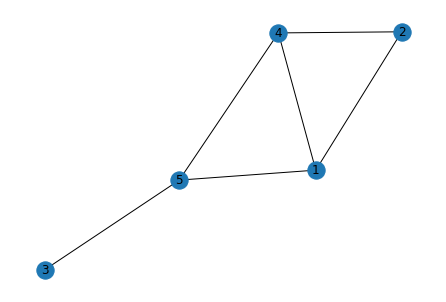

In [27]:
nx.draw(G1, with_labels=True)

BFS is not used for weighted graphs, because it considers steps as the distance and does not take into account weights that an edge contributes. 

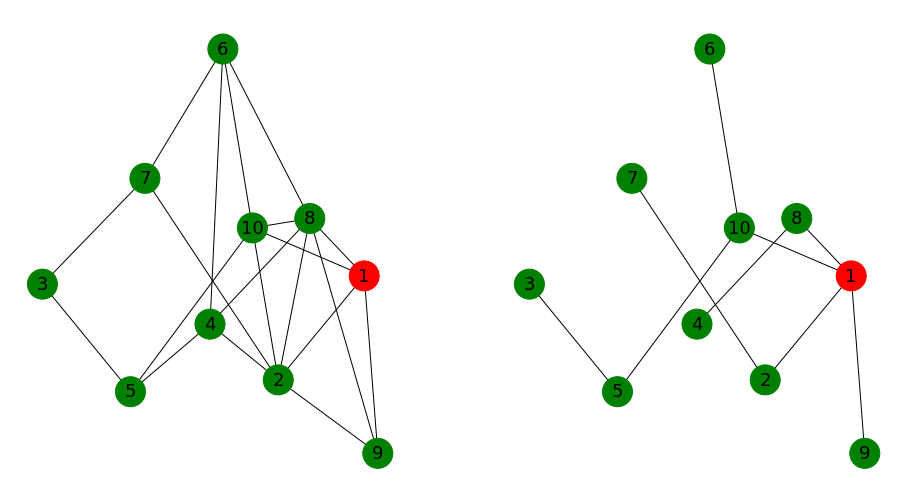

In [45]:

from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
pos = nx.spring_layout(G1)

source = 1
color_ls = ['g']*len(pos)
color_ls[source-1] = 'r'
draw_kwargs = dict(with_labels=True, node_size=900, node_color=color_ls, font_size=18)
nx.draw(G1, ax=ax[0], pos=pos, **draw_kwargs)
bfs_G = BFS(G1, source)
nx.draw(bfs_G, ax=ax[1], pos=pos, **draw_kwargs)

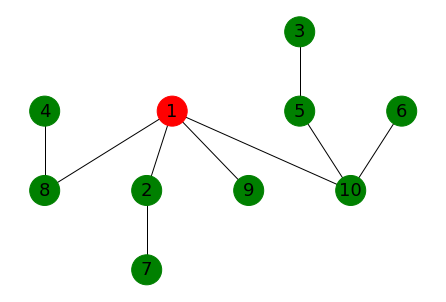

In [46]:
pos_tree = nx.drawing.nx_agraph.pygraphviz_layout(bfs_G, prog='dot', root=source)
pos = nx.nx_pydot.pydot_layout(bfs_G, prog="dot", root=source)
nx.draw(bfs_G,  pos=pos, **draw_kwargs)